## Final Project Submission

Please fill out:
* Student name: Eric Roberts, Justin Williams
* Student pace: full time
* Scheduled project review date/time: _Friday, October 2nd 2020 9:30AM - 12:00PM_
* Instructor name: FangFang Lee
* Blog post URL:N/A


## Project Description
In order to stay consistant with project directives current is defined as __2015__ to present. Therefore, analysis is restricted to 2015 onward. 

2015 was chosen to provide stability to our estimates while reamining relatively current. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

9 `CSV` datasets

In [2]:
bom_movie_gross = pd.read_csv('Data/bom.movie_gross.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_name_basics = pd.read_csv('Data/imdb.name.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_akas = pd.read_csv('Data/imdb.title.akas.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_basics = pd.read_csv('Data/imdb.title.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_crew = pd.read_csv('Data/imdb.title.crew.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_principals = pd.read_csv('Data/imdb.title.principals.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_ratings = pd.read_csv('Data/imdb.title.ratings.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
tmdb_movies = pd.read_csv('Data/tmdb.movies.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
tn_movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')

2 `TSV` datasets

In [3]:
rt_movie_info = pd.read_csv('Data/rt.movie_info.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', encoding='ISO-8859-1', quotechar='"')

rt_reviews = pd.read_csv('Data/rt.reviews.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', encoding='ISO-8859-1', quotechar='"')

## EDA and cleaning `bom_movie_gross`

In [4]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Info 
#### Missing Values
* ~ 1300 missing in Foreign Gross and convert to float
* ~ 30 in domestic gross (already float)
* Studio is missing 5 values, may not be important

In [5]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Set _index_ to movie title

In [6]:
bom_movie_gross.set_index(['title'], inplace=True)

__Domestic Gross__ 
_Top 5_

Divide column by 1 million to makes totals easier to evaluate

In [7]:
bom_movie_gross['domestic_gross_mm'] = bom_movie_gross['domestic_gross'] / 1000000

In [8]:
bom_movie_gross.sort_values(by='domestic_gross_mm', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7
Black Panther,BV,700100000.0,646900000,2018,700.1
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3
Marvel's The Avengers,BV,623400000.0,895500000,2012,623.4


If over 1 billion, total is annotated as such `"1,131.6"` see foreign gross for Star Wars from [Box Office Mojo](https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_se_r_8).

__Foreign Gross__

_Cannot sort because dtype is object_

Additionally, scale needs to be adjusted, to the same way `domestic_gross` is annotated, so that data can be analyzed on the same scale. 

In [9]:
bom_movie_gross.sort_values(by='foreign_gross', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Life's a Breeze,Magn.,3500.0,99700,2014,0.0035
The East,FoxS,2300000.0,99700,2013,2.3000
White Lion,Scre.,NaN,99600,2010,NaN
A United Kingdom,FoxS,3900000.0,9900000,2017,3.9000
Le Havre,Jan.,612000.0,9900000,2011,0.6120


_These are the 5 films that had foreign gross > 1 billion_

In [10]:
# filter foreign gross over 1 billion
bill_filt = bom_movie_gross['foreign_gross'].str.contains(',', na=False)
bom_movie_gross[bill_filt]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,226.0
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8


### Create Function
* Checks if value is a string 
* If True, check for comma. 
* If True remove comma and convert to float. 
* If False, return float and divide by 1 million 
* Otherwise the value is numeric.

In [11]:
def clean_convert_gross(x):
    """Check if value is a string, if True, check for comma.
    If True remove comma and convert to float. If False, return float 
    and divide by 1 million otherwise the value is numeric."""
    if isinstance(x, str):
        if ',' in x:
            billion = x.replace(',','')
            return float(billion)
        if ',' not in x:
            return (float(x))/1000000
    return(x)

In [12]:
bom_movie_gross['foreign_gross_mm'] = bom_movie_gross['foreign_gross'].apply(clean_convert_gross)

In [13]:
bom_movie_gross.head()

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm
title,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0
Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3
Inception,WB,292600000.0,535700000,2010,292.6,535.7
Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9


Sort by new column `foreign_gross_mm` to get top 5 foreign gross to check function output.

In [14]:
bom_movie_gross.sort_values(by='foreign_gross_mm', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm
title,,,,,,
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,226.0,1010.0


Create a `total_gross` column

NaN values where assigned 0 with the assumption no gross.

In [15]:
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross_mm'].fillna(0) + bom_movie_gross['foreign_gross_mm'].fillna(0)

Checking output

In [16]:
bom_movie_gross.sort_values(by='total_gross', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross
title,,,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6,2068.3
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5,2048.3
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4,1671.7
Marvel's The Avengers,BV,623400000.0,895500000,2012,623.4,895.5,1518.9
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0,1516.0


Creating histograms of continuous variables

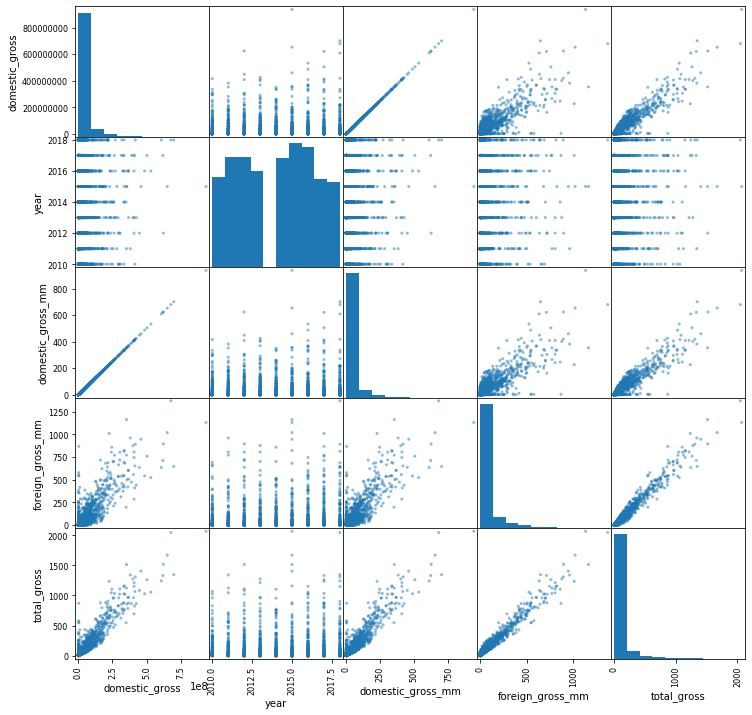

In [17]:
pd.plotting.scatter_matrix(bom_movie_gross, figsize=(12,12));

In [18]:
bom_movie_gross.describe()

,domestic_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross
count,3.359000e+03,3387.000000,3359.000000,2037.000000,3387.000000
mean,2.874585e+07,2013.958075,28.745845,77.667849,75.218985
std,6.698250e+07,2.478141,66.982498,147.244653,180.854110
min,1.000000e+02,2010.000000,0.000100,0.000600,0.000100
25%,1.200000e+05,2012.000000,0.120000,3.800000,0.274000
50%,1.400000e+06,2014.000000,1.400000,19.000000,5.475000
75%,2.790000e+07,2016.000000,27.900000,75.900000,61.350000
max,9.367000e+08,2018.000000,936.700000,1369.500000,2068.300000


All three gross profit variables are right skewed - the mean is much higher than the median.  Will consider both as measures of central tendency as the stakeholders are likely interested in the opportunity for large profit margins. 

## EDA and cleaning `imdb_title_basics` dataset

* Categorizing the genre variable in the IMDB dataset
* Original genres classification contained 1085 unique classifications  
* These are combinations of certain basic classifications therefore creating non-mutually exclusive genre classifications.

Get unique values

In [19]:
imdb_title_basics['genres'].nunique()

1085

In [20]:
imdb_title_basics['genres']

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                     NaN
146143             Documentary
Name: genres, Length: 146144, dtype: object

Check for null

In [21]:
imdb_title_basics['genres'].isna().sum()

5408

Create list of all genres

In [22]:
list_of_genres = list(imdb_title_basics['genres'])

NaN interpreted as a float which prevents us iterating over this entries with string methods
Use the isinstance to get around this problem

In [23]:
list_of_genres2 = []

for a in range(0, len(list_of_genres)):
    if isinstance(list_of_genres[a], str):
        list_of_genres2.append(list_of_genres[a])

Multiple entries are seperated by commas. Use split function to make each genre an individual entry.

In [24]:
list_of_genres3 = []
for a in range(0, len(list_of_genres2)):
    list_of_genres3.extend(list_of_genres2[a].split(','))

Use set function to get the list of unique genres  

In [25]:
unique_genres = set(list_of_genres3)

unique_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

Use the `unique_genres` list to create the non-mutually exclusive variables

In [26]:
for genre in unique_genres:
    imdb_title_basics[f'{genre}_movie'] = imdb_title_basics['genres'].str.contains(f'{genre}')

In [27]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,History_movie,Adult_movie,Adventure_movie,Talk-Show_movie,...,Sport_movie,Biography_movie,Horror_movie,Action_movie,News_movie,Musical_movie,Crime_movie,Western_movie,Family_movie,War_movie
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Dataframe Merges

### Merge `IMDB_title_basics` with `BOM_movie_gross`

Rest index so that `title` and `primary_title` in merged df.

In [28]:
bom_movie_gross.reset_index(inplace=True)

Checking to see if titles duplicated.

In [29]:
imdb_title_basics.duplicated(subset=['primary_title']).sum()

10073

__10073__ duplicated titles. Merge on `title` and `year` to obtain correct output.

In [30]:
bom_gross_title_basics = pd.merge(bom_movie_gross, imdb_title_basics, how='left', 
                                  left_on=['title','year'], right_on=['primary_title','start_year'])

Checking output

In [31]:
bom_gross_title_basics.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,Sport_movie,Biography_movie,Horror_movie,Action_movie,News_movie,Musical_movie,Crime_movie,Western_movie,Family_movie,War_movie
0,Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0,1067.0,tt0435761,Toy Story 3,...,False,False,False,False,False,False,False,False,False,False
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3,1025.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3,960.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,292.6,535.7,828.3,tt1375666,Inception,...,False,False,False,True,False,False,False,False,False,False
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9,752.6,tt0892791,Shrek Forever After,...,False,False,False,False,False,False,False,False,False,False


In [32]:
bom_gross_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3427 entries, 0 to 3426
Data columns (total 41 columns):
title                3427 non-null object
studio               3422 non-null object
domestic_gross       3399 non-null float64
foreign_gross        2061 non-null object
year                 3427 non-null int64
domestic_gross_mm    3399 non-null float64
foreign_gross_mm     2061 non-null float64
total_gross          3427 non-null float64
tconst               1873 non-null object
primary_title        1873 non-null object
original_title       1873 non-null object
start_year           1873 non-null float64
runtime_minutes      1863 non-null float64
genres               1871 non-null object
History_movie        1871 non-null object
Adult_movie          1871 non-null object
Adventure_movie      1871 non-null object
Talk-Show_movie      1871 non-null object
Comedy_movie         1871 non-null object
Short_movie          1871 non-null object
Mystery_movie        1871 non-null object
Drama_

### Merge new df with `imdb_title_ratings`

In [33]:
bom_gross_title_basics_ratings = pd.merge(bom_gross_title_basics, imdb_title_ratings, how='left', 
                                  left_on='tconst', right_on='tconst')

In [34]:
bom_gross_title_basics_ratings.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,Horror_movie,Action_movie,News_movie,Musical_movie,Crime_movie,Western_movie,Family_movie,War_movie,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0,1067.0,tt0435761,Toy Story 3,...,False,False,False,False,False,False,False,False,8.3,682218.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3,1025.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3,960.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,292.6,535.7,828.3,tt1375666,Inception,...,False,True,False,False,False,False,False,False,8.8,1841066.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9,752.6,tt0892791,Shrek Forever After,...,False,False,False,False,False,False,False,False,6.3,167532.0


## Bivariable analysis of gross profit by genre

Obtain overall `mean` and `median` of df

In [35]:
print(bom_gross_title_basics_ratings['domestic_gross_mm'].mean())
print(bom_gross_title_basics_ratings['domestic_gross_mm'].median())

28.682456922035893
1.4


In order to stay consistant with project directives current is defined as __2015__ to present. Therefore, analysis is restricted to 2015 onward. 

2015 was chosen to provide stability to our estimates while reamining relatively current. 

In [36]:
bom_gross_title_basics_ratings[bom_gross_title_basics_ratings['year'] > 2014]

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,Horror_movie,Action_movie,News_movie,Musical_movie,Crime_movie,Western_movie,Family_movie,War_movie,averagerating,numvotes
1888,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7000,1131.6,2068.3000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889,Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3000,1019.4,1671.7000,tt0369610,Jurassic World,...,False,True,False,False,False,False,False,False,7.0,539338.0
1890,Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0000,1163.0,1516.0000,tt2820852,Furious 7,...,False,True,False,False,True,False,False,False,7.2,335074.0
1891,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,459.0000,946.4,1405.4000,tt2395427,Avengers: Age of Ultron,...,False,True,False,False,False,False,False,False,7.3,665594.0
1892,Minions,Uni.,336000000.0,823400000,2015,336.0000,823.4,1159.4000,tt2293640,Minions,...,False,False,False,False,False,False,False,False,6.4,193917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,The Quake,Magn.,6200.0,NaN,2018,0.0062,NaN,0.0062,tt6523720,The Quake,...,False,True,False,False,False,False,False,False,6.2,5270.0
3423,Edward II (2018 re-release),FM,4800.0,NaN,2018,0.0048,NaN,0.0048,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3424,El Pacto,Sony,2500.0,NaN,2018,0.0025,NaN,0.0025,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3425,The Swan,Synergetic,2400.0,NaN,2018,0.0024,NaN,0.0024,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check value_counts in unique_genre list to determine if genre should be included in subsequent analysis. Minimum sample size of less than 10 were dropped. 

In [37]:
for genre in unique_genres:
    print(bom_gross_title_basics_ratings.loc[bom_gross_title_basics_ratings['year'] > 2014, f'''{genre}_movie'''].value_counts())

False    805
True      52
Name: History_movie, dtype: int64
False    857
Name: Adult_movie, dtype: int64
False    681
True     176
Name: Adventure_movie, dtype: int64
False    857
Name: Talk-Show_movie, dtype: int64
False    582
True     275
Name: Comedy_movie, dtype: int64
False    857
Name: Short_movie, dtype: int64
False    789
True      68
Name: Mystery_movie, dtype: int64
True     454
False    403
Name: Drama_movie, dtype: int64
False    734
True     123
Name: Thriller_movie, dtype: int64
False    804
True      53
Name: Documentary_movie, dtype: int64
False    746
True     111
Name: Romance_movie, dtype: int64
False    799
True      58
Name: Animation_movie, dtype: int64
False    857
Name: Reality-TV_movie, dtype: int64
False    857
Name: Game-Show_movie, dtype: int64
False    802
True      55
Name: Fantasy_movie, dtype: int64
False    826
True      31
Name: Music_movie, dtype: int64
False    812
True      45
Name: Sci-Fi_movie, dtype: int64
False    843
True      14
Name: Sport_m

Due to a lack of data the following categories will no longer be considered for analysis: News_movie, Talk-Show_movie, Game-Show_movie, Short_movie, Adult_movie, Reality-TV_movie, Westerns and Musicals

Sport_movie only has 14 observations and War_movie 12 but will include for now.

In [38]:
unique_genres_analysis = unique_genres

Remove dropped genres from list

In [39]:
unique_genres_analysis.remove('News')
unique_genres_analysis.remove('Talk-Show')
unique_genres_analysis.remove('Game-Show')
unique_genres_analysis.remove('Short')
unique_genres_analysis.remove('Adult')
unique_genres_analysis.remove('Western')
unique_genres_analysis.remove('Musical')
unique_genres_analysis.remove('Reality-TV')

In [40]:
unique_genres_analysis = list(unique_genres_analysis)

Get `mean` and `median` for gross by genre

In [41]:
mean_gross_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['domestic_gross_mm'].mean()[1]
    mean_gross_by_genre.append(a)
    
median_gross_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['domestic_gross_mm'].median()[1]
    median_gross_by_genre.append(a)

mean_foreign_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['foreign_gross_mm'].mean()[1]
    mean_foreign_by_genre.append(a)
    
median_foreign_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['foreign_gross_mm'].median()[1]
    median_foreign_by_genre.append(a)
    
mean_total_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['total_gross'].mean()[1]
    mean_total_by_genre.append(a)
    
median_total_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['total_gross'].median()[1]
    median_total_by_genre.append(a)    

### Create new df for genre analysis

In [42]:
genre_df = pd.DataFrame(
    {'genre': unique_genres_analysis,
    'mean_dom_gross': mean_gross_by_genre,
    'median_dom_gross': median_gross_by_genre,
    'mean_foreign_gross': mean_foreign_by_genre,
    'median_foreign_gross': median_foreign_by_genre,
    'mean_total_gross': mean_total_by_genre,
    'median_total_gross': median_total_by_genre
    })
genre_df

,genre,mean_dom_gross,median_dom_gross,mean_foreign_gross,median_foreign_gross,mean_total_gross,median_total_gross
0,History,25.840736,3.6500,50.561708,21.60,57.954254,13.4500
1,Adventure,112.063309,64.7000,232.694106,161.55,322.012629,199.9000
2,Comedy,45.475245,17.8500,87.703017,32.00,108.573685,35.1630
3,Mystery,33.411046,15.8000,66.258639,35.80,82.978577,33.8000
4,Drama,23.201862,4.2000,49.418280,18.50,54.148682,11.9145
5,Thriller,39.811611,15.8000,99.913275,33.40,112.577098,37.2000
6,Documentary,6.415689,0.5310,12.932485,2.10,11.532895,0.8500
7,Romance,19.871571,3.0500,38.869912,21.00,42.804819,8.9220
8,Animation,115.436853,85.1500,242.508081,193.20,326.035976,242.5000
9,Fantasy,67.230785,31.1000,160.496321,67.25,198.709768,78.6000


## Create visualizations of above analysis

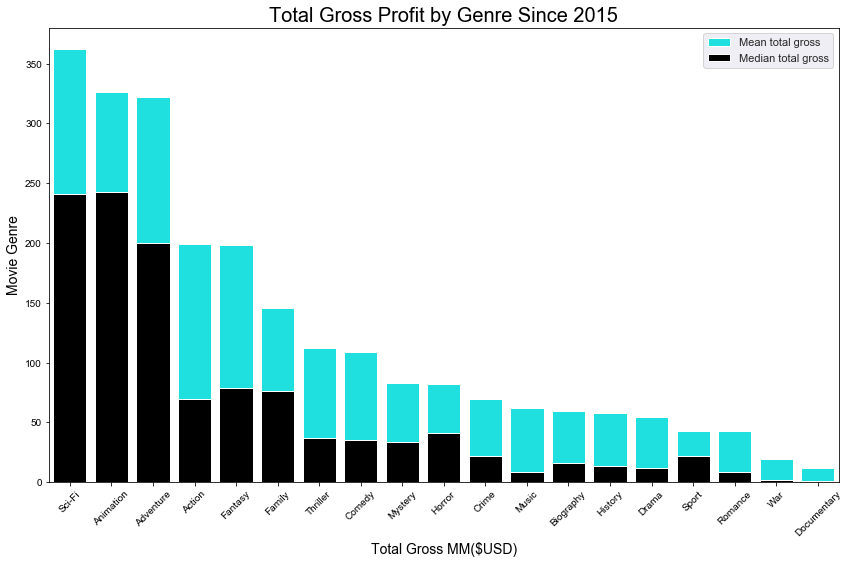

In [43]:
genre_df.sort_values(by='mean_total_gross', ascending =False, inplace=True)

fig, ax = plt.subplots(figsize=(12,8))
sns.set()
sns.set_style("darkgrid")
sns.set_context("notebook")
ax = sns.barplot(data=genre_df, y='mean_total_gross', x='genre', 
                orient='v', color='cyan', label='Mean total gross');
ax = sns.barplot(data=genre_df, y='median_total_gross', x='genre', 
                orient='v', color='black', label='Median total gross');

plt.xticks(rotation=45)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Total Gross MM($USD)', fontsize=14)
ax.set_ylabel('Movie Genre', fontsize=14)
ax.set_title('Total Gross Profit by Genre Since 2015', fontsize=20)
ax.legend();
plt.tight_layout()
plt.savefig('./images/total_gross.png')

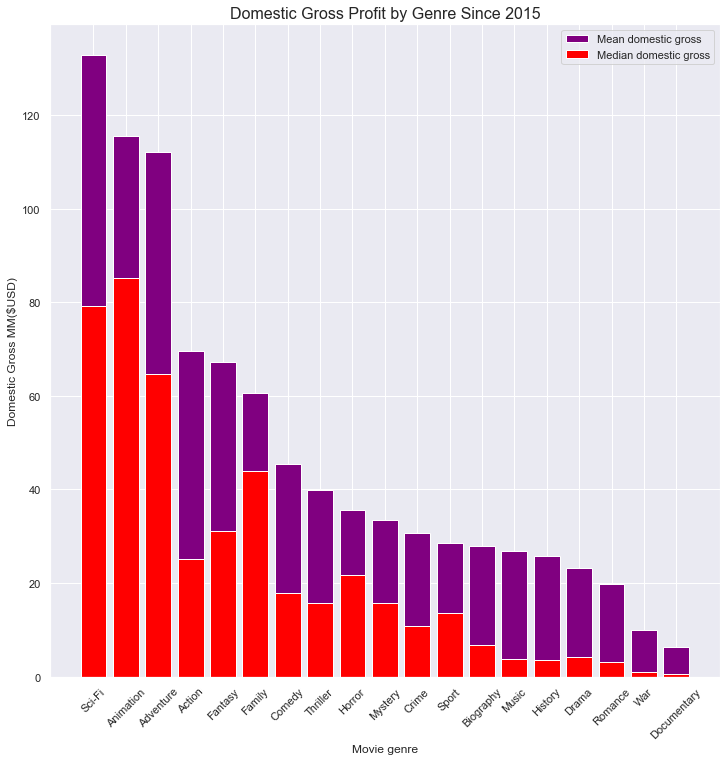

In [44]:
genre_df.sort_values(by='mean_dom_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.bar(x='genre', height = 'mean_dom_gross', data=genre_df, color='purple',label='Mean domestic gross')
ax.bar(x='genre', height = 'median_dom_gross', data=genre_df, color='red',label='Median domestic gross')

plt.xticks(rotation=45)
plt.legend();

ax.set_xlabel('Movie genre')
ax.set_ylabel('Domestic Gross MM($USD)')
ax.set_title('Domestic Gross Profit by Genre Since 2015', fontsize=16)
plt.savefig('./images/dom_gross.png')

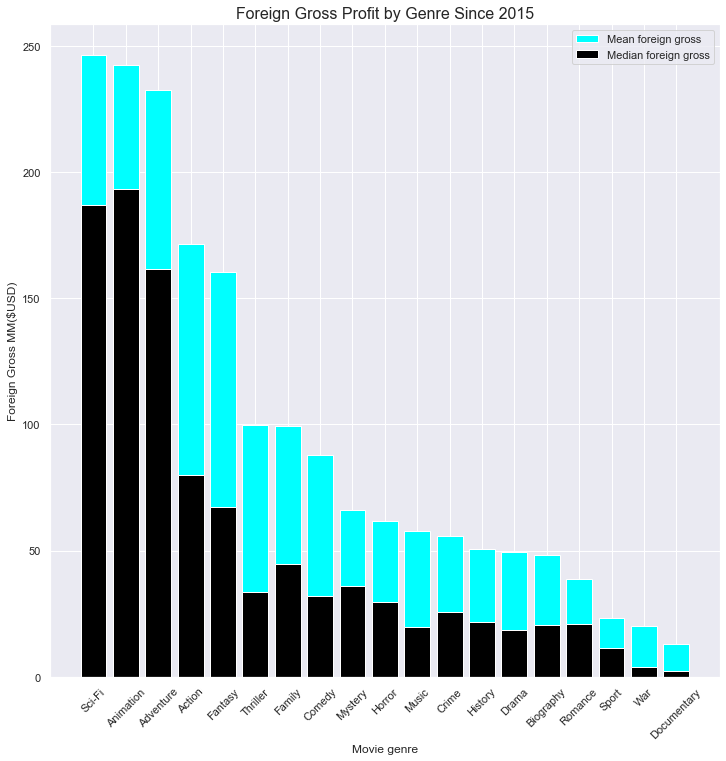

In [45]:
genre_df.sort_values(by='mean_foreign_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.bar(x='genre', height = 'mean_foreign_gross', data=genre_df, color='cyan',label='Mean foreign gross')
ax.bar(x='genre', height = 'median_foreign_gross', data=genre_df, color='black',label='Median foreign gross')

plt.xticks(rotation=45)
plt.legend();

ax.set_xlabel('Movie genre')
ax.set_ylabel('Foreign Gross MM($USD)')
ax.set_title('Foreign Gross Profit by Genre Since 2015', fontsize=16)
plt.savefig('./images/foreign_gross.png')

Order of genres is the same therefore only total_gross will be presented to stakeholders

## Analysis of mutually exclusive genre categorizations (multiple categories)
#### Sci-Fi, Animation, Adventure, Action and Fantasy are the top grossing genres - here investigating the multiple categorizations within these global categories

Analysis contains the full dataset - below I restrict to years 2015 onwards and replicate the analysis

Consistent with analytic plan, restricting by year

In [46]:
genre_restricted_years = bom_gross_title_basics_ratings.loc[bom_gross_title_basics_ratings['year'] > 2014]

In [47]:
genre_restricted_years.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,Horror_movie,Action_movie,News_movie,Musical_movie,Crime_movie,Western_movie,Family_movie,War_movie,averagerating,numvotes
1888,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6,2068.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889,Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4,1671.7,tt0369610,Jurassic World,...,False,True,False,False,False,False,False,False,7.0,539338.0
1890,Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0,1516.0,tt2820852,Furious 7,...,False,True,False,False,True,False,False,False,7.2,335074.0
1891,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,459.0,946.4,1405.4,tt2395427,Avengers: Age of Ultron,...,False,True,False,False,False,False,False,False,7.3,665594.0
1892,Minions,Uni.,336000000.0,823400000,2015,336.0,823.4,1159.4,tt2293640,Minions,...,False,False,False,False,False,False,False,False,6.4,193917.0


In [48]:
genre_restricted_years_valcount = genre_restricted_years['genres'].value_counts()

In [49]:
mean_total_multi_rest = genre_restricted_years.groupby(['genres'])['total_gross'].mean()
median_total_multi_rest = genre_restricted_years.groupby(['genres'])['total_gross'].median()
multi_genre_restrict_df = pd.DataFrame(
    {'n_obs': genre_restricted_years_valcount,
    'mean_total_gross': mean_total_multi_rest,
    'median_total_gross': median_total_multi_rest,
    })
multi_genre_restrict_df

,n_obs,mean_total_gross,median_total_gross
Action,4,14.173725,0.3235
"Action,Adventure,Animation",8,241.477500,41.2500
"Action,Adventure,Biography",3,228.900000,93.9000
"Action,Adventure,Comedy",19,379.324584,256.3000
"Action,Adventure,Crime",7,91.359543,82.4000
...,...,...,...
"Mystery,Romance,Thriller",1,0.898000,0.8980
"Mystery,Thriller",1,0.185000,0.1850
Romance,4,20.947500,0.3900
Sci-Fi,1,0.078000,0.0780


In [50]:
multi_genre_restrict_df.reset_index(inplace=True)

Create genre as a column to facilitate visualization. 

In [51]:
multi_genre_restrict_df.rename(columns = {'index':'Genre'}, inplace=True)

In [52]:
multi_genre_restrict_10obs_df = multi_genre_restrict_df[multi_genre_restrict_df['n_obs'] > 10]

/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


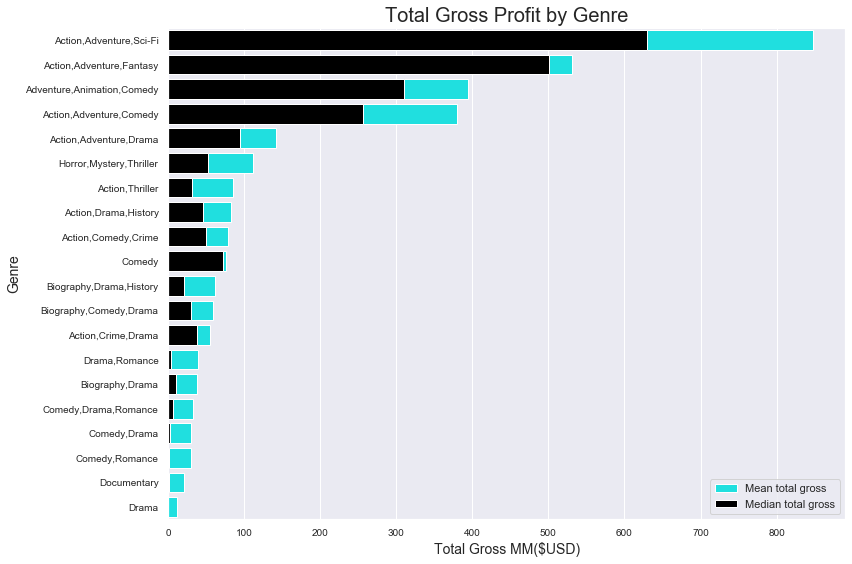

In [53]:
multi_genre_restrict_10obs_df.sort_values(by='mean_total_gross', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(12,8))
sns.set()
sns.set_style("darkgrid")
sns.set_context("notebook")
ax = sns.barplot(data=multi_genre_restrict_10obs_df, x='mean_total_gross', y='Genre', 
                orient='h', color='cyan', label='Mean total gross');
ax = sns.barplot(data=multi_genre_restrict_10obs_df, x='median_total_gross', y='Genre', 
                orient='h', color='black', label='Median total gross');

ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Total Gross MM($USD)', fontsize=14)
ax.set_ylabel('Genre', fontsize=14)
ax.set_title('Total Gross Profit by Genre', fontsize=20)
ax.legend();
plt.tight_layout()
plt.savefig('./images/multigenre_total_gross_restrict_years_tenObs.png')


## Analysis of `imdb_title_ratings`

In [54]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Check for null values

In [55]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Get descriptive statistics

In [56]:
imdb_title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


What is the relationship between `averagerating` and `numvotes`?

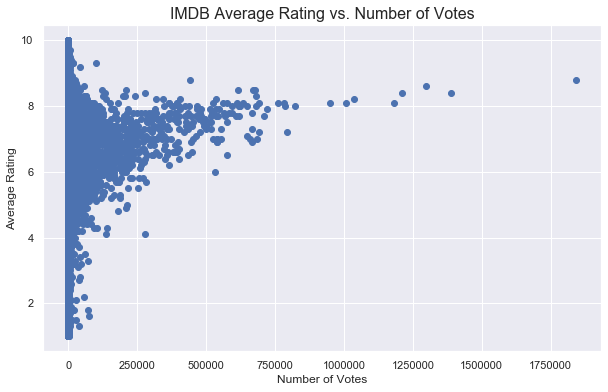

In [57]:
ratings_fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(imdb_title_ratings['numvotes'], imdb_title_ratings['averagerating'])
ax.set_title('IMDB Average Rating vs. Number of Votes', fontsize=16)
ax.set_xlabel('Number of Votes')
ax.set_ylabel('Average Rating')
plt.show()

Stability of movie `averagerating`corresponds with `numvotes` being closer to mean.

## Create visualizations of `bom_movie_gross` and `imdb_title_ratings`

In [58]:
bom_gross_title_basics_ratings.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,Horror_movie,Action_movie,News_movie,Musical_movie,Crime_movie,Western_movie,Family_movie,War_movie,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0,1067.0,tt0435761,Toy Story 3,...,False,False,False,False,False,False,False,False,8.3,682218.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3,1025.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3,960.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,292.6,535.7,828.3,tt1375666,Inception,...,False,True,False,False,False,False,False,False,8.8,1841066.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9,752.6,tt0892791,Shrek Forever After,...,False,False,False,False,False,False,False,False,6.3,167532.0


Create `bool` column for > or < mean of `averagerating`.

In [59]:
bom_gross_title_basics_ratings['avg_averagerating'] = bom_gross_title_basics_ratings['averagerating'] > bom_gross_title_basics_ratings['averagerating'].mean()

Create new df by selecting columns needed for this visulization

In [60]:
bom_gross_ratings_df = bom_gross_title_basics_ratings[['title', 'domestic_gross_mm', 'foreign_gross_mm','total_gross','averagerating', 'avg_averagerating']]

In [61]:
bom_gross_ratings_df.set_index('title', inplace=True)

In [62]:
bom_gross_ratings_df.head()

,domestic_gross_mm,foreign_gross_mm,total_gross,averagerating,avg_averagerating
title,,,,,
Toy Story 3,415.0,652.0,1067.0,8.3,True
Alice in Wonderland (2010),334.2,691.3,1025.5,NaN,False
Harry Potter and the Deathly Hallows Part 1,296.0,664.3,960.3,NaN,False
Inception,292.6,535.7,828.3,8.8,True
Shrek Forever After,238.7,513.9,752.6,6.3,False


Set `bool` values to Yes/No

In [63]:
bom_gross_ratings_df = bom_gross_ratings_df.replace({'avg_averagerating': {True: 'Yes',
                                                                          False: 'No'}})

Create Scatterplot to show relationship between Total Gross vs. Average Rating

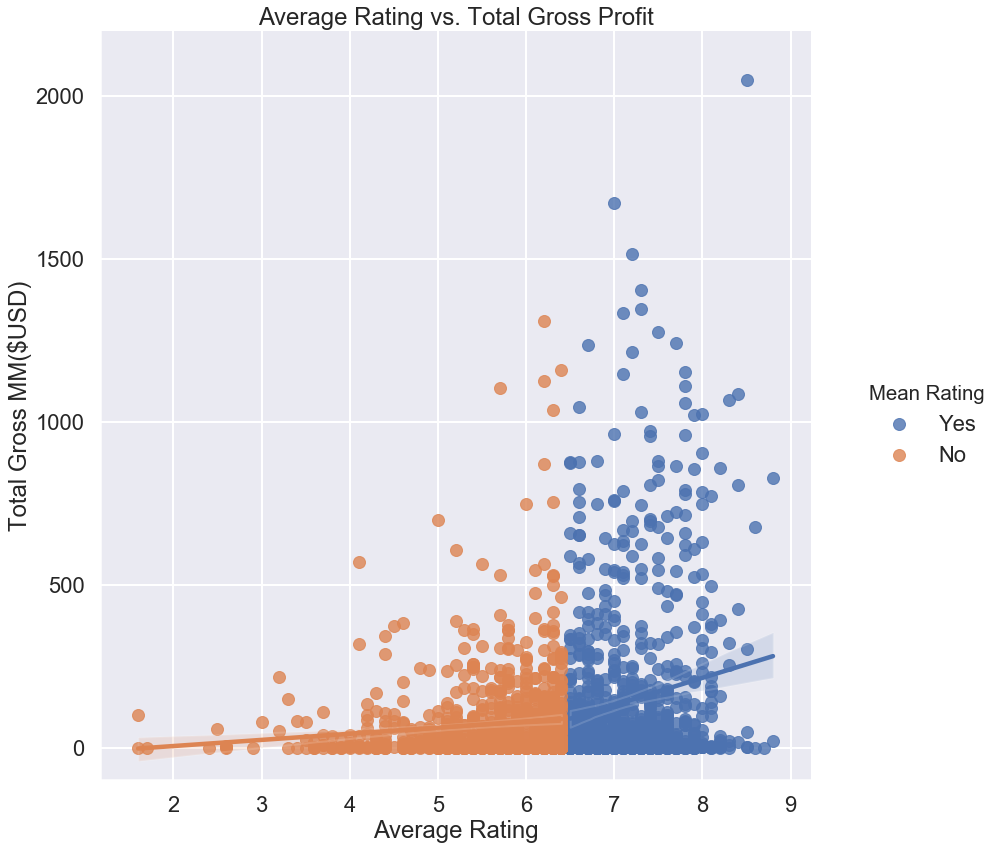

In [89]:
sns.set()
sns.set_style("darkgrid")
sns.set_context("poster")
ax = sns.lmplot(data=bom_gross_ratings_df, x='averagerating', y='total_gross', hue='avg_averagerating', 
                height=12, hue_order=['Yes', 'No']);
ax.set_xlabels('Average Rating')
ax.set_ylabels('Total Gross MM($USD)')
ax.set(ylim=(-100,2200))
ax._legend.set_title('Mean Rating')
plt.title('Average Rating vs. Total Gross Profit')
plt.savefig('./images/avg_rating_vs_total_gross.png')

Remove Top 5/Bottom 5 and regraph

In [65]:
bom_gross_ratings_df.sort_values(by='total_gross', ascending=False, inplace=True)

In [66]:
bom_gross_ratings_df_top5 = bom_gross_ratings_df.iloc[5:-5]

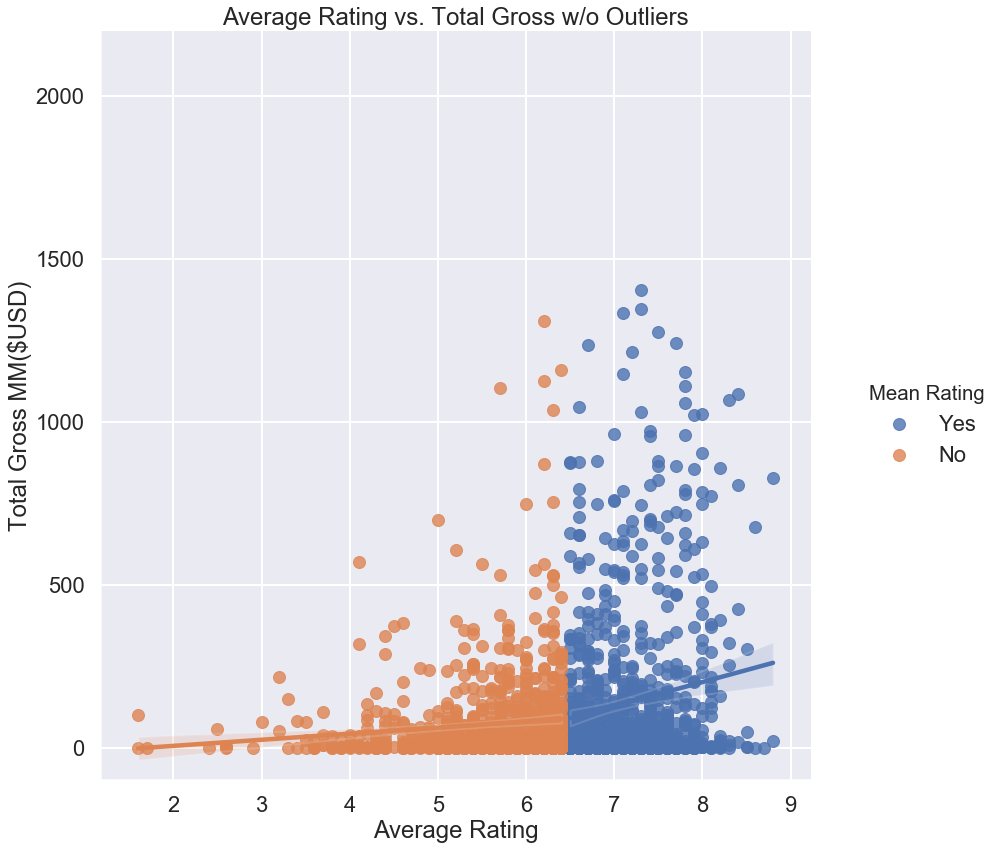

In [67]:
sns.set()
sns.set_style("darkgrid")
sns.set_context("poster")
ax = sns.lmplot(data=bom_gross_ratings_df_top5, x='averagerating', y='total_gross', hue='avg_averagerating', 
                height=12, hue_order=['Yes', 'No']);
ax.set_xlabels('Average Rating')
ax.set_ylabels('Total Gross MM($USD)')
ax.set(ylim=(-100,2200))
ax._legend.set_title('Mean Rating')
plt.title('Average Rating vs. Total Gross w/o Outliers')
plt.savefig('./images/avg_rating_vs_total_gross_no_outliers.png');

## EDA and cleaning on `tn_movie_budgets`

In [68]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [69]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


All $ columns are strings, must convert to integer to begin comparsion.

In [70]:
tn_movie_budgets['worldwide_gross'].apply(type).value_counts()

<class 'str'>    5782
Name: worldwide_gross, dtype: int64

Converts `production_budget`, `domestic_gross`, and `worldwide_gross` to integer.

In [71]:
tn_movie_budgets_conv = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in tn_movie_budgets_conv:
    tn_movie_budgets[col] = tn_movie_budgets[col].apply(lambda num: int(''.join(x for x in num if x.isnumeric())))

In [72]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


Need to convert `release_date` to datetime object

In [73]:
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

In [74]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Extract Month, Day, Year and DOW

In [75]:
tn_movie_budgets['year'] = tn_movie_budgets['release_date'].dt.year
tn_movie_budgets['month'] = tn_movie_budgets['release_date'].dt.month
tn_movie_budgets['day'] = tn_movie_budgets['release_date'].dt.day
tn_movie_budgets['dow'] = tn_movie_budgets['release_date'].dt.dayofweek

In [76]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,dow
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,18,4
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,20,4
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6,7,4
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,1,4
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,15,4


In [77]:
tn_movie_budgets.sort_values(by='worldwide_gross', ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,dow
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,18,4
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997,12,19,4
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,12,18,4
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,4,27,4
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,6,12,4


## Profit Pattern

In [78]:
profit_by_month_year = tn_movie_budgets[tn_movie_budgets['year']>2014].groupby(['month'])['worldwide_gross'].mean().reset_index()

In [79]:
profit_by_month_year

,month,worldwide_gross
0,1,7.604506e+07
1,2,1.192849e+08
2,3,1.241620e+08
3,4,1.246194e+08
4,5,1.697967e+08
5,6,1.957910e+08
6,7,1.968663e+08
7,8,7.840900e+07
8,9,7.156239e+07
9,10,7.255204e+07


In [80]:
month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep',
             10: 'Oct', 11: 'Nov', 12: 'Dec'}

profit_by_month_year['month'] = profit_by_month_year['month'].map(month_dict)

In [81]:
profit_by_month_year.head()

,month,worldwide_gross
0,Jan,7.604506e+07
1,Feb,1.192849e+08
2,Mar,1.241620e+08
3,Apr,1.246194e+08
4,May,1.697967e+08


Normalize profit data

In [82]:
profit_by_month_year['worldwide_gross'] = profit_by_month_year['worldwide_gross']/1000000

In [83]:
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Total Gross MM($USD)', fontsize=14)
ax.set_ylabel('Genre', fontsize=14)
ax.set_title('Total Gross Profit by Genre', fontsize=20)
ax.legend();

AttributeError: 'FacetGrid' object has no attribute 'tick_params'

In [ ]:
# plot bar char
fig, ax = plt.subplots(figsize=(20,12))

ax.bar(x=profit_by_month_year['month'], height=profit_by_month_year['worldwide_gross'])
ax.set_title('Avg Total Profit by release date 2015 to present',fontsize=30)
ax.set_xlabel('Month', fontsize=24)
ax.set_ylabel('Profit in MM ($USD)',fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.savefig('./images/avg_profit_by_month_2015_to_present.png');